In [1]:
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3.0,male,22.0,1.0,0.0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1.0,female,38.0,1.0,0.0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3.0,female,26.0,0.0,0.0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1.0,female,35.0,1.0,0.0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3.0,male,35.0,0.0,0.0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
598,0,3.0,male,NaN,0.0,0.0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
599,1,1.0,male,49.0,1.0,0.0,56.9292,C,First,man,True,A,Cherbourg,yes,False
600,1,2.0,female,24.0,2.0,1.0,27.0000,S,Second,woman,False,NaN,Southampton,yes,False
601,0,3.0,male,NaN,0.0,0.0,7.8958,S,Third,man,True,NaN,Southampton,no,True
602,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Print summary statistics
summary_statistics = titanic.describe()
print(summary_statistics)

         survived      pclass         age       sibsp       parch        fare
count  603.000000  602.000000  475.000000  602.000000  602.000000  602.000000
mean     0.393035    2.308970   29.770526    0.539867    0.375415   31.798200
std      0.488830    0.834501   14.522232    1.097223    0.773044   46.219945
min      0.000000    1.000000    0.750000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   21.000000    0.000000    0.000000    7.925000
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.500000
75%      1.000000    3.000000   38.000000    1.000000    0.000000   30.500000
max      1.000000    3.000000   71.000000    8.000000    5.000000  512.329200


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     603 non-null    int64   
 1   pclass       602 non-null    float64 
 2   sex          602 non-null    object  
 3   age          475 non-null    float64 
 4   sibsp        602 non-null    float64 
 5   parch        602 non-null    float64 
 6   fare         602 non-null    float64 
 7   embarked     601 non-null    object  
 8   class        602 non-null    category
 9   who          602 non-null    object  
 10  adult_male   602 non-null    object  
 11  deck         136 non-null    category
 12  embark_town  601 non-null    object  
 13  alive        602 non-null    object  
 14  alone        602 non-null    object  
dtypes: category(2), float64(5), int64(1), object(7)
memory usage: 63.0+ KB


In [5]:
titanic.dtypes

survived          int64
pclass          float64
sex              object
age             float64
sibsp           float64
parch           float64
fare            float64
embarked         object
class          category
who              object
adult_male       object
deck           category
embark_town      object
alive            object
alone            object
dtype: object

In [6]:
titanic["age"].fillna(130,inplace = True)

titanic.tail()

C:\Users\piyus\AppData\Local\Temp\ipykernel_8300\3012437743.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["age"].fillna(130,inplace = True)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
598,0,3.0,male,130.0,0.0,0.0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
599,1,1.0,male,49.0,1.0,0.0,56.9292,C,First,man,True,A,Cherbourg,yes,False
600,1,2.0,female,24.0,2.0,1.0,27.0000,S,Second,woman,False,NaN,Southampton,yes,False
601,0,3.0,male,130.0,0.0,0.0,7.8958,S,Third,man,True,NaN,Southampton,no,True
602,0,NaN,NaN,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:

# Fill missing embarked values with mode (if 'embarked' is present)
if 'embarked' in titanic.columns:
    titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])

# Drop 'deck' and 'embark_town' if they exist
for col in ['deck', 'embark_town']:
    if col in titanic.columns:
        titanic.drop(columns=[col], inplace=True)

#  Correct Data Types
titanic['sex'] = titanic['sex'].astype('category')
titanic['embarked'] = titanic['embarked'].astype('category')

titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
598,0,3.0,male,130.0,0.0,0.0,7.2250,C,Third,man,True,no,True
599,1,1.0,male,49.0,1.0,0.0,56.9292,C,First,man,True,yes,False
600,1,2.0,female,24.0,2.0,1.0,27.0000,S,Second,woman,False,yes,False
601,0,3.0,male,130.0,0.0,0.0,7.8958,S,Third,man,True,no,True
602,0,NaN,NaN,130.0,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN


In [8]:
print(titanic.count())

survived      603
pclass        602
sex           602
age           603
sibsp         602
parch         602
fare          602
embarked      603
class         602
who           602
adult_male    602
alive         602
alone         602
dtype: int64


TypeError: 'value' must be an instance of str or bytes, not a float

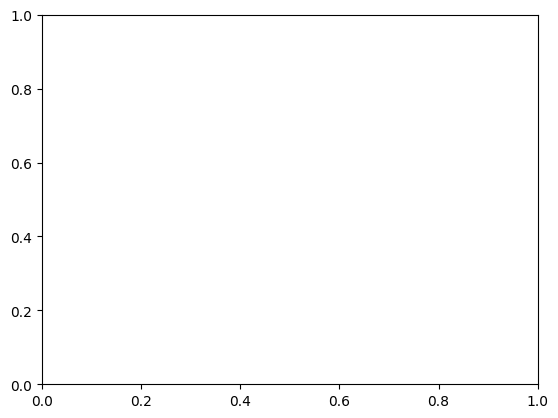

In [3]:
#Univariate analysis
#Bar plot

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

plt.bar(titanic.sex,titanic.age)
plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Titanic')
plt.show()



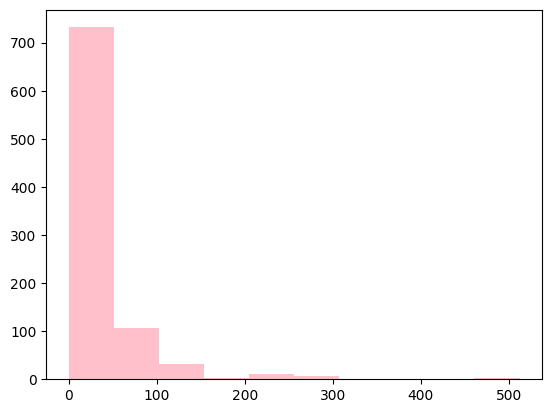

In [ ]:
#Histogram
plt.hist(titanic.fare,color='pink')
plt.show()

<Axes: xlabel='fare', ylabel='age'>

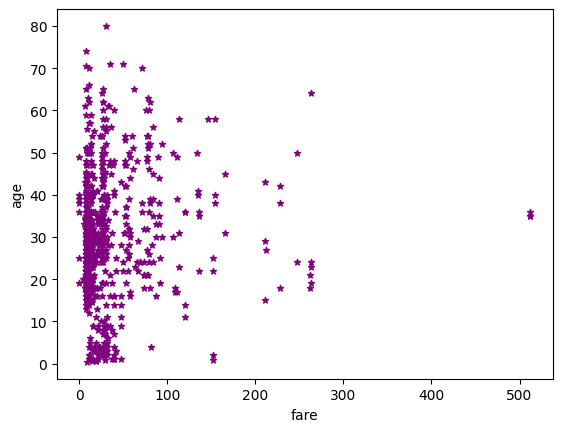

In [ ]:
#Scatter plot
titanic.plot(x='fare',y='age',kind='scatter',marker='*',color='purple')


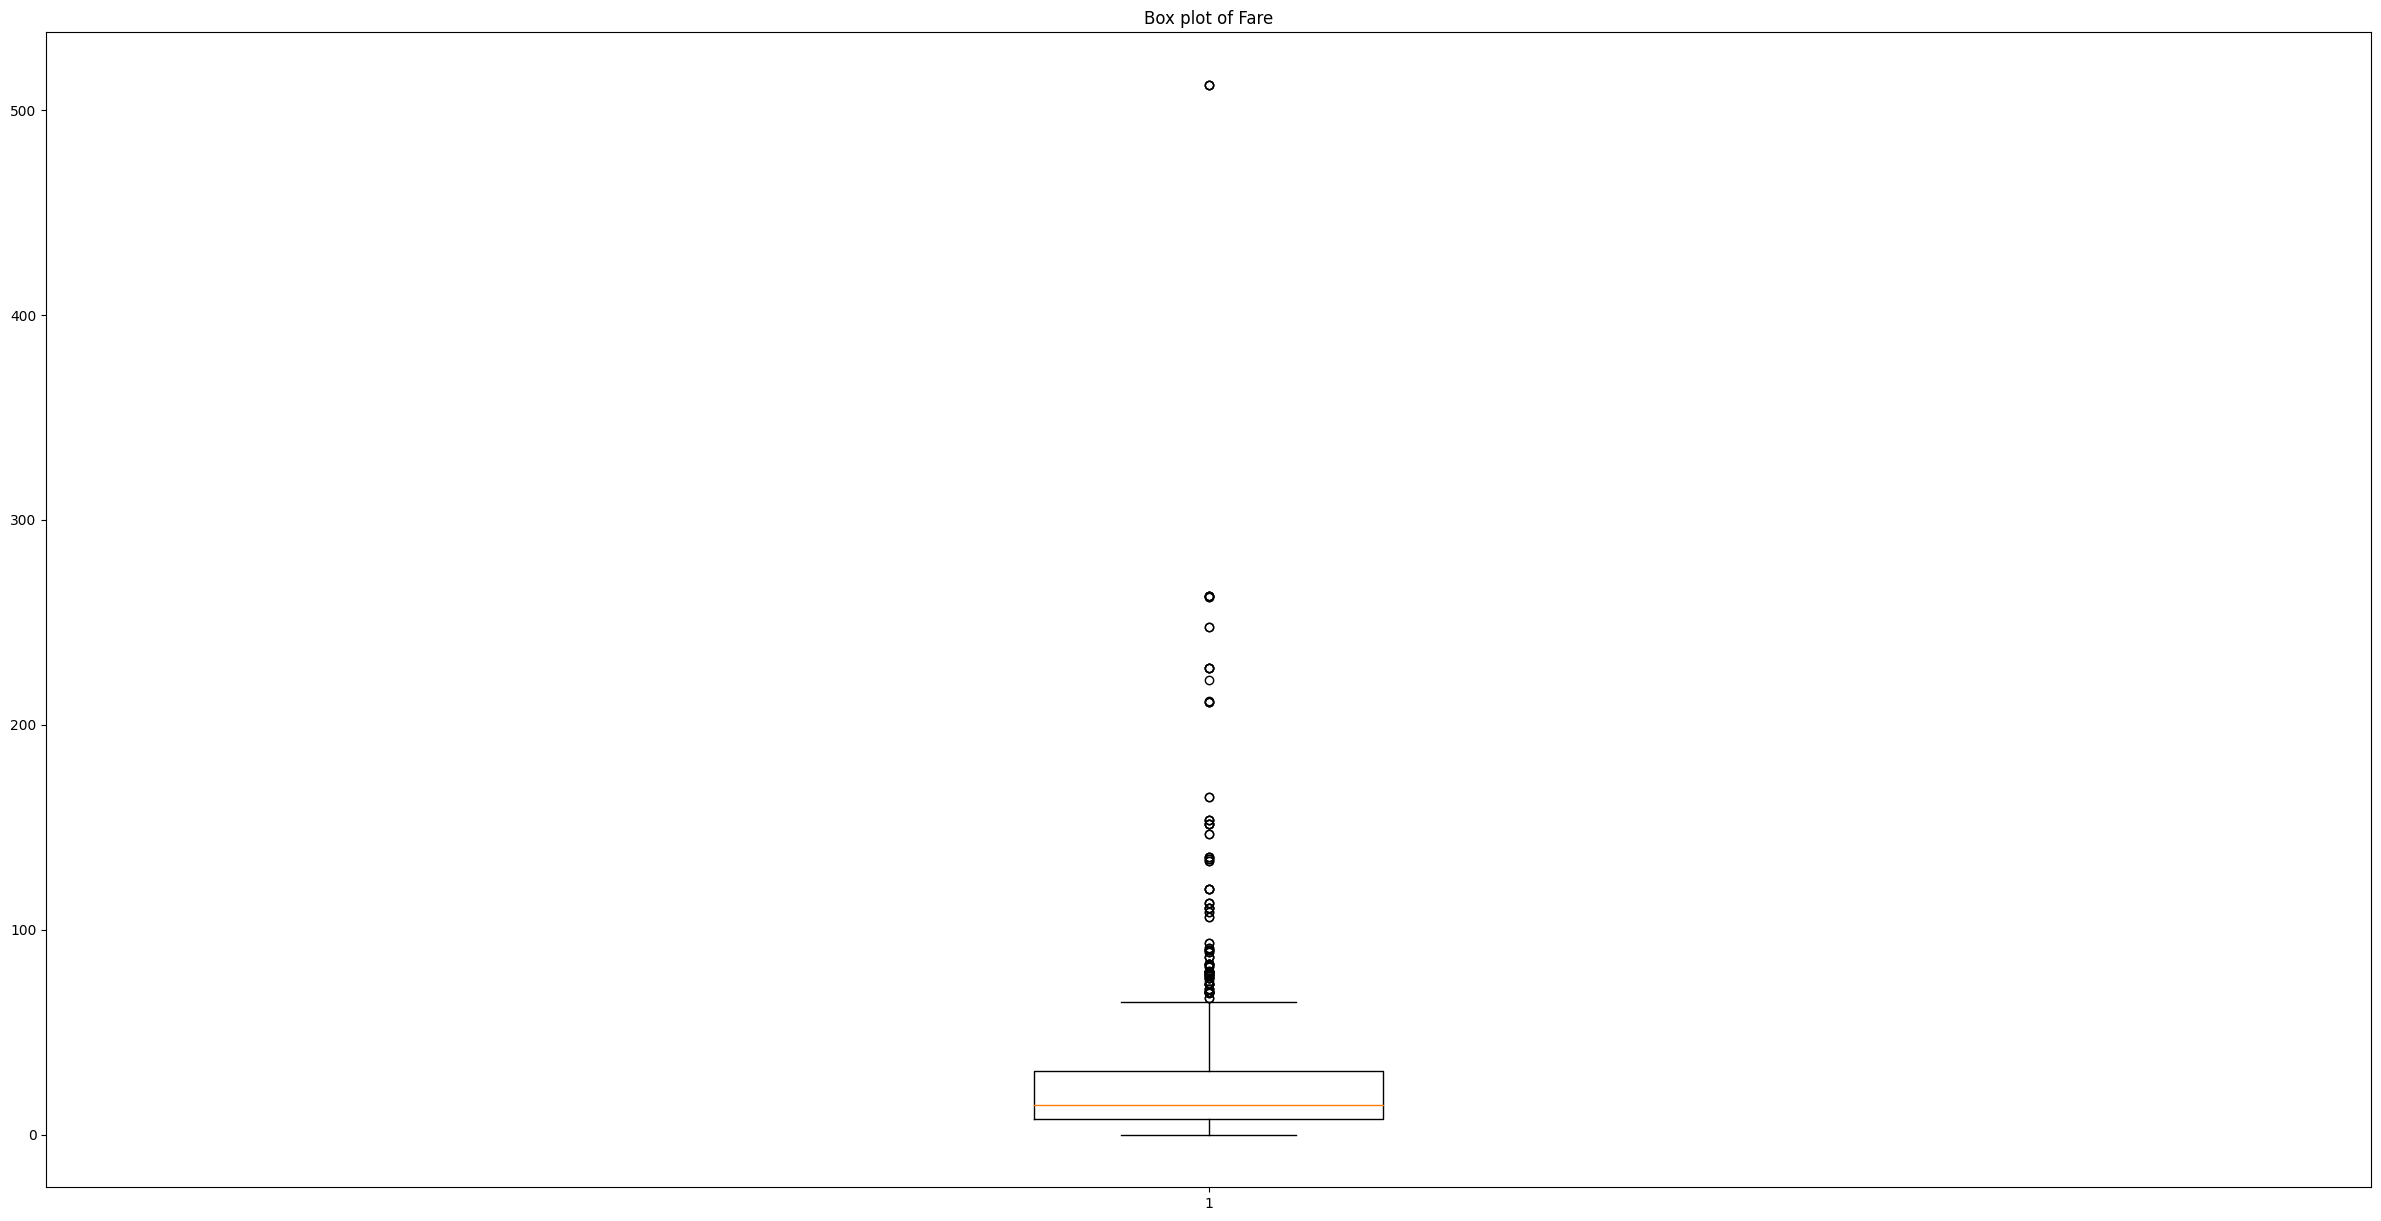

In [ ]:
#Box plot
plt.figure(figsize=(30,15))
plt.boxplot(titanic.fare)

plt.title('Box plot of Fare')
plt.show()

<Axes: xlabel='fare', ylabel='pclass'>

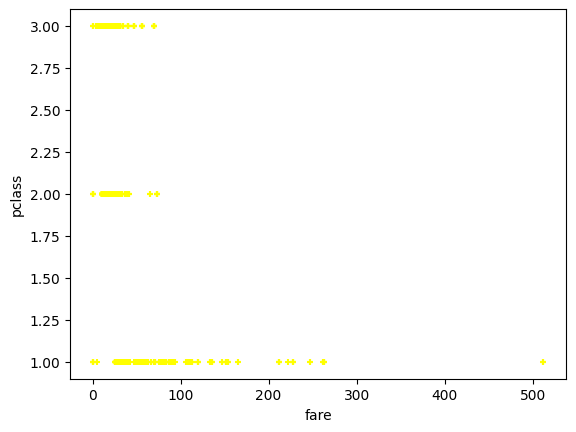

In [ ]:
#Scatter plot
titanic.plot(x='fare',y='pclass',kind='scatter',marker='+',color='yellow')

<Axes: xlabel='fare'>

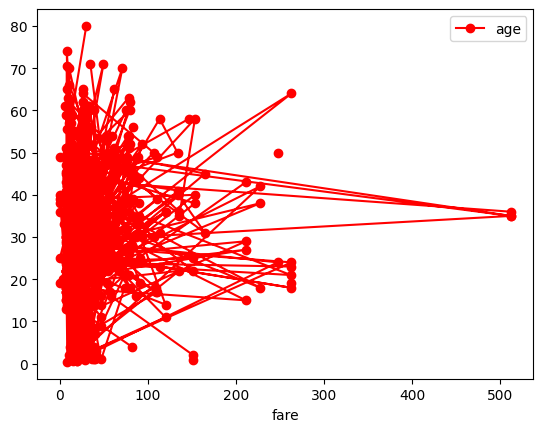

In [ ]:
#Line plot
titanic.plot(x='fare',y='age',kind='line',marker='o',color='red')

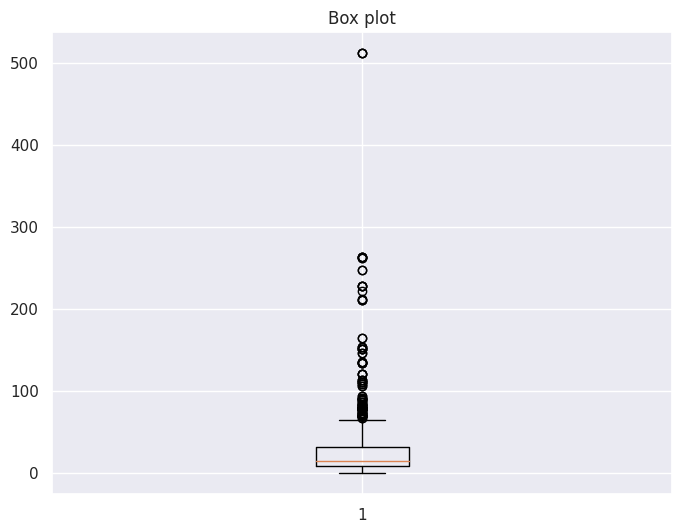

In [ ]:
#Box plot
plt.figure(figsize=(8,6))
plt.boxplot(titanic.fare)

plt.title('Box plot')
plt.show()